In [21]:
from standardInclude import *

In [22]:
#f = r.TFile("./data/gm2offline_ana.root")
#f = r.TFile("./data/gm2offline_ana_onlyAboveThresholdClusters.root")
#f = r.TFile("./data/results_9files_truncationComparison.root")
#f = r.TFile("./data/gm2offline_ana_sameClustering.root")
f = r.TFile("./data/results_10MissingOutputFiles_9day_histOnly.root")
f.ls()

TFile**		./data/results_10MissingOutputFiles_9day_histOnly.root	
 TFile*		./data/results_10MissingOutputFiles_9day_histOnly.root	
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	farlineTrunc;1	farlineTrunc (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	clusterCompare;1	clusterCompare (ReconComparisonTruncatedVsFull) folder


---

### Lets first grab Aarons clustering

In [23]:
clusters = f.Get("clustersAndCoincidences").Get("clusters").Clone("clusters")
clustersTrunc = f.Get("clustersAndCoincidencesTrunc").Get("clusters").Clone("clustersTrunc")

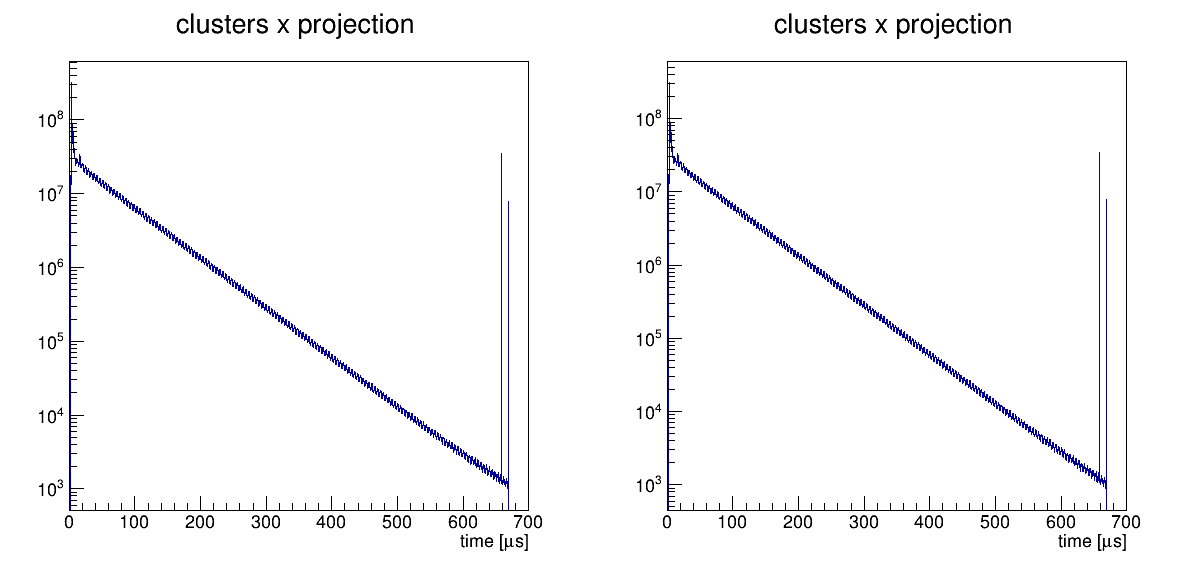

In [24]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)

c.cd(1)
clusters.Project3D("x").Draw()
r.gPad.SetLogy()

c.cd(2)
clustersTrunc.Project3D("x").Draw()
r.gPad.SetLogy()

c.Draw()

---

### Now lets break this up into energy divisions

In [25]:
energyBin = 50
minE = 2100
maxE = 3100
rebinFactor = 1
sumw2 = False
#sumw2 = True

#times for fitting
tmin = 22
tmax = 650

In [26]:
caloTimes = []
caloTimesInt = []

for calo in range(1,25):
    e1 = minE
    e2 = maxE
    caloBin = clusters.GetZaxis().FindBin(calo)
    print(caloBin)
    
    clusters.GetYaxis().SetRangeUser(e1, e2)
    clusters.GetZaxis().SetRange(caloBin, caloBin)
    ci = clusters.Project3D("x").Clone("clusters_"+str(calo))
    ci.SetTitle("Full Clusters in Calo "+str(calo))
    ci.Rebin(rebinFactor)
    
    clustersTrunc.GetYaxis().SetRangeUser(e1, e2)
    clustersTrunc.GetZaxis().SetRange(caloBin, caloBin)
    cti = clustersTrunc.Project3D("x").Clone("clustersTrunc_"+str(calo))
    cti.SetTitle("Truncated Clusters in Calo "+str(calo))
    cti.Rebin(rebinFactor)
    
    if(sumw2):
        ci.Sumw2()
        cti.Sumw2()

    caloTimes.append( (ci, cti) )
    caloTimesInt.append( (ci.Integral(), cti.Integral()) )

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [27]:
print(caloTimes)
print(caloTimesInt)

[(<ROOT.TH1D object ("clusters_1") at 0x7f2be2d74770>, <ROOT.TH1D object ("clustersTrunc_1") at 0x7f2be2d61740>), (<ROOT.TH1D object ("clusters_2") at 0x7f2be2d5db70>, <ROOT.TH1D object ("clustersTrunc_2") at 0x7f2be1f8ebf0>), (<ROOT.TH1D object ("clusters_3") at 0x7f2be1fd6770>, <ROOT.TH1D object ("clustersTrunc_3") at 0x7f2be218b620>), (<ROOT.TH1D object ("clusters_4") at 0x7f2be1fe9c10>, <ROOT.TH1D object ("clustersTrunc_4") at 0x7f2be2d3ecd0>), (<ROOT.TH1D object ("clusters_5") at 0x7f2be1cc9ef0>, <ROOT.TH1D object ("clustersTrunc_5") at 0x7f2be1cfa4b0>), (<ROOT.TH1D object ("clusters_6") at 0x7f2be2d61da0>, <ROOT.TH1D object ("clustersTrunc_6") at 0x7f2be2d53ab0>), (<ROOT.TH1D object ("clusters_7") at 0x7f2be2d10800>, <ROOT.TH1D object ("clustersTrunc_7") at 0x7f2be2d665e0>), (<ROOT.TH1D object ("clusters_8") at 0x7f2be2d17f90>, <ROOT.TH1D object ("clustersTrunc_8") at 0x7f2be2d45920>), (<ROOT.TH1D object ("clusters_9") at 0x7f2be2d58ce0>, <ROOT.TH1D object ("clustersTrunc_9") at 

In [28]:
print(caloTimes)
print(caloTimesInt)

[(<ROOT.TH1D object ("clusters_1") at 0x7f2be2d74770>, <ROOT.TH1D object ("clustersTrunc_1") at 0x7f2be2d61740>), (<ROOT.TH1D object ("clusters_2") at 0x7f2be2d5db70>, <ROOT.TH1D object ("clustersTrunc_2") at 0x7f2be1f8ebf0>), (<ROOT.TH1D object ("clusters_3") at 0x7f2be1fd6770>, <ROOT.TH1D object ("clustersTrunc_3") at 0x7f2be218b620>), (<ROOT.TH1D object ("clusters_4") at 0x7f2be1fe9c10>, <ROOT.TH1D object ("clustersTrunc_4") at 0x7f2be2d3ecd0>), (<ROOT.TH1D object ("clusters_5") at 0x7f2be1cc9ef0>, <ROOT.TH1D object ("clustersTrunc_5") at 0x7f2be1cfa4b0>), (<ROOT.TH1D object ("clusters_6") at 0x7f2be2d61da0>, <ROOT.TH1D object ("clustersTrunc_6") at 0x7f2be2d53ab0>), (<ROOT.TH1D object ("clusters_7") at 0x7f2be2d10800>, <ROOT.TH1D object ("clustersTrunc_7") at 0x7f2be2d665e0>), (<ROOT.TH1D object ("clusters_8") at 0x7f2be2d17f90>, <ROOT.TH1D object ("clustersTrunc_8") at 0x7f2be2d45920>), (<ROOT.TH1D object ("clusters_9") at 0x7f2be2d58ce0>, <ROOT.TH1D object ("clustersTrunc_9") at 

In [29]:
clusterDiff = []
clusterDiffInt = []
for i, (ci, cti) in enumerate(caloTimes):
    cdi = ci.Clone("caloDiff_"+str(i+1))
    cdi.Add(cti, -1)
    clusterDiff.append(cdi)
    caloInt = cdi.Integral()
    clusterDiffInt.append( caloInt )

In [30]:
print(clusterDiff)

[<ROOT.TH1D object ("caloDiff_1") at 0x7f2be285f8e0>, <ROOT.TH1D object ("caloDiff_2") at 0x7f2be1fe90b0>, <ROOT.TH1D object ("caloDiff_3") at 0x7f2be2d7e430>, <ROOT.TH1D object ("caloDiff_4") at 0x7f2be2d22450>, <ROOT.TH1D object ("caloDiff_5") at 0x7f2be2d709e0>, <ROOT.TH1D object ("caloDiff_6") at 0x7f2be219ff00>, <ROOT.TH1D object ("caloDiff_7") at 0x7f2be2d70430>, <ROOT.TH1D object ("caloDiff_8") at 0x7f2be1fb84d0>, <ROOT.TH1D object ("caloDiff_9") at 0x7f2be28484e0>, <ROOT.TH1D object ("caloDiff_10") at 0x7f2be3123860>, <ROOT.TH1D object ("caloDiff_11") at 0x7f2be2d5c750>, <ROOT.TH1D object ("caloDiff_12") at 0x7f2be1fd6c90>, <ROOT.TH1D object ("caloDiff_13") at 0x7f2be1deb7e0>, <ROOT.TH1D object ("caloDiff_14") at 0x7f2be303e850>, <ROOT.TH1D object ("caloDiff_15") at 0x7f2be2d7ba90>, <ROOT.TH1D object ("caloDiff_16") at 0x7f2be28db4a0>, <ROOT.TH1D object ("caloDiff_17") at 0x7f2be2d497a0>, <ROOT.TH1D object ("caloDiff_18") at 0x7f2be1f45b90>, <ROOT.TH1D object ("caloDiff_19") at

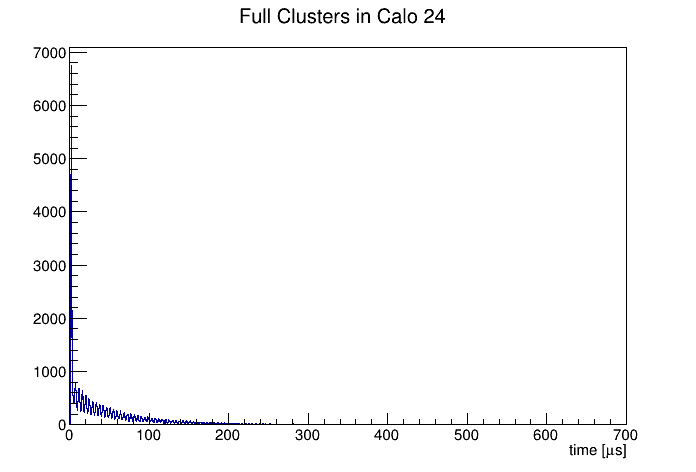

In [31]:
c = r.TCanvas()
cdi.Draw()
c.Draw()

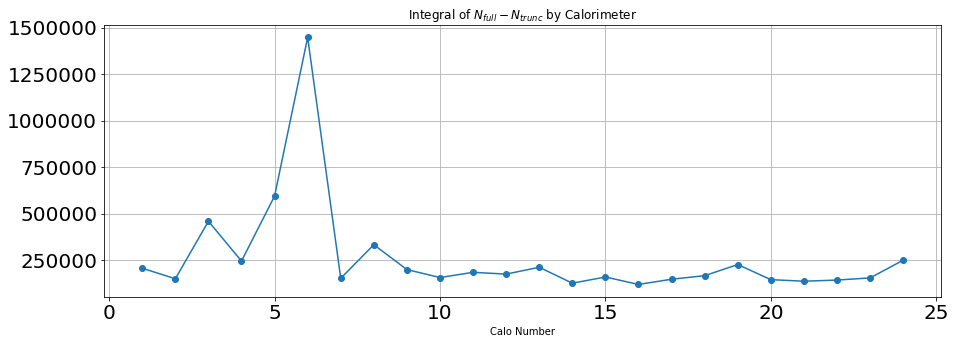

In [32]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot([x+1 for x in range(len(clusterDiffInt))], clusterDiffInt,"o-")
plt.grid()
plt.title(r"Integral of $N_{full} - N_{trunc}$ by Calorimeter")
plt.xlabel("Calo Number")
plt.show()

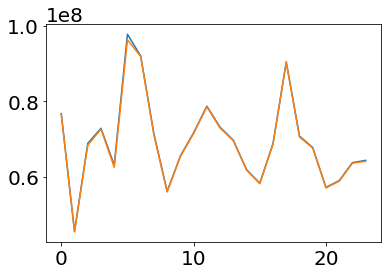

In [33]:
plt.plot([x[0] for x in caloTimesInt])
plt.plot([x[1] for x in caloTimesInt])
plt.show()

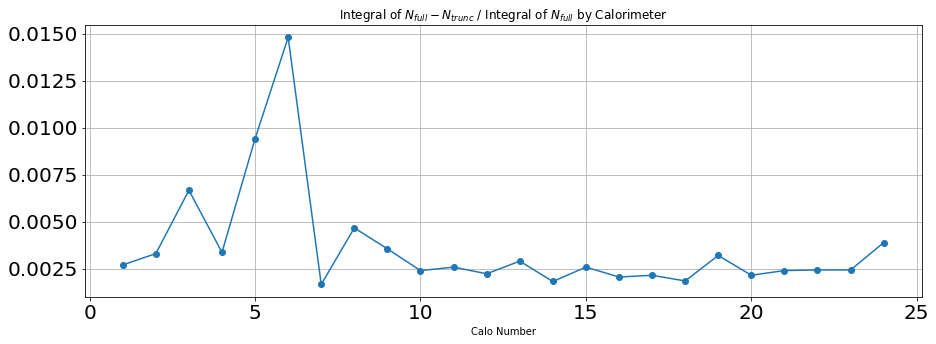

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot([x+1 for x in range(len(clusterDiffInt))], [x/caloTimesInt[i][0] for i,x in enumerate(clusterDiffInt)],"o-")
plt.grid()
plt.title(r"Integral of $N_{full} - N_{trunc}$ / Integral of $N_{full}$ by Calorimeter")
plt.xlabel("Calo Number")
plt.show()

---

### Are the slopes of the ratio any different by calorimeter?

In [35]:
linFit = r.TF1("linFit","pol1",tmin,tmax)

In [36]:
clusterRatio = []
ratioFits = []
ratioFitErrs = []
for i, cdi in enumerate(clusterDiff):
    cri = cdi.Clone("clusterRatio_"+str(i+1))
    cri.Divide( caloTimes[i][0] )
    cri.Fit("linFit","REMBQ")
    ratioFits.append( (linFit.GetParameter(0), linFit.GetParameter(1)) )
    ratioFitErrs.append( (linFit.GetParError(0), linFit.GetParError(1)) )
    clusterRatio.append(cri)

In [37]:
p0s,p1s = zip(*ratioFits)
p0es,p1es = zip(*ratioFitErrs)

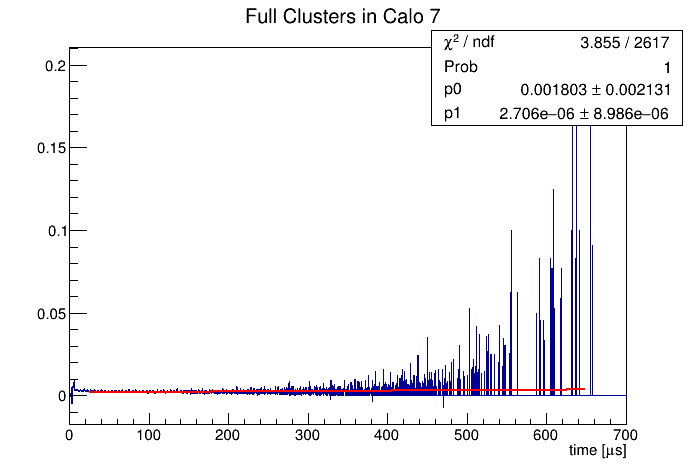

In [38]:
c = r.TCanvas()
clusterRatio[6].Draw()
c.Draw()

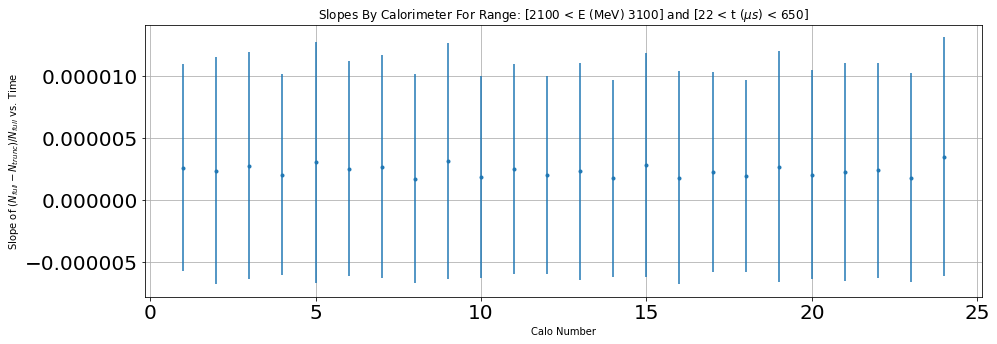

In [39]:
fig, ax = plt.subplots(figsize=(15,5))
plt.errorbar([x+1 for x in range(len(clusterRatio))], p1s, yerr=p1es, fmt="." )
plt.title(r"Slopes By Calorimeter For Range: ["+str(minE)+" < E (MeV) "+str(maxE)+"] and ["+str(tmin)+" < t ($\mu s$) < "+str(tmax)+"]")
plt.xlabel("Calo Number")
plt.ylabel(r"Slope of $(N_{full} - N_{trunc}) / N_{full}$ vs. Time")
plt.grid()
plt.show()

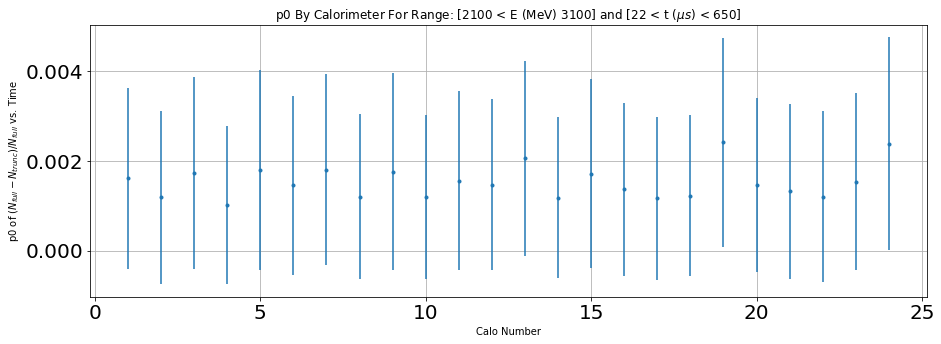

In [40]:
fig, ax = plt.subplots(figsize=(15,5))
plt.errorbar([x+1 for x in range(len(clusterRatio))], p0s, yerr=p0es, fmt="." )
plt.title(r"p0 By Calorimeter For Range: ["+str(minE)+" < E (MeV) "+str(maxE)+"] and ["+str(tmin)+" < t ($\mu s$) < "+str(tmax)+"]")
plt.xlabel("Calo Number")
plt.ylabel(r"p0 of $(N_{full} - N_{trunc}) / N_{full}$ vs. Time")
plt.grid()
plt.show()